In [35]:
import pylab
import csv
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
with open('complete.csv','rb') as csvfile:
    reader = csv.reader(csvfile)
    i = 0
    x = [[],[],[],[],[],[],[]]
    for row in reader:
        if(i != 0):
           # print row[] + ", " + row[2]
            if(float(row[6]) != 0):
                x[0].append(float(row[8]))
                x[1].append(float(row[11]))
                x[2].append(float(row[6]))
                x[3].append(float(row[9]))
                x[4].append(row[12])
                x[5].append(float(row[14]))
                x[6].append(float(row[15]))
        else:
            i = i +1

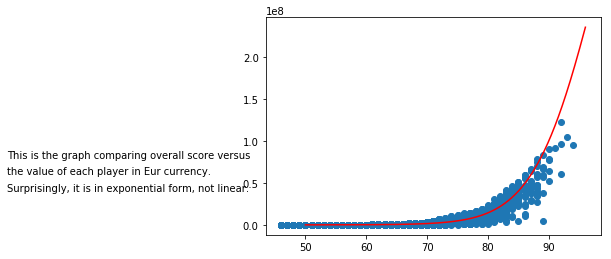

In [40]:

def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c
    popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1))

xp = np.linspace(50, 96, 1000)
p4 = np.poly1d(np.polyfit(x[0], np.log(x[2]), 3))
pylab.scatter(x[0], x[2])
pylab.plot(xp, np.exp(p4(xp)), c='r')
plt.text(1,80000000, 'This is the graph comparing overall score versus')
plt.text(1,60000000, 'the value of each player in Eur currency.')
plt.text(1,40000000, 'Surprisingly, it is in exponential form, not linear.')
plt.show()


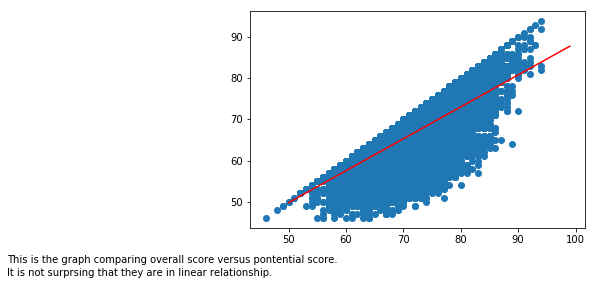

In [55]:
overAndPo = np.poly1d(np.polyfit(x[3], x[0], 1))

xp = np.linspace(50, 99, 1000)
plt.scatter(x[3], x[0])
plt.plot(xp, overAndPo(xp),c = 'r')
plt.text(1,35, 'This is the graph comparing overall score versus pontential score.')
plt.text(1,32, 'It is not surprsing that they are in linear relationship.')
plt.show()

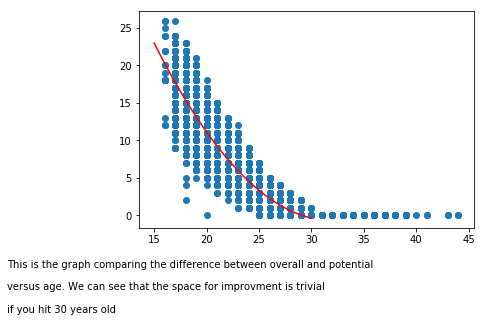

In [59]:
gap = []
for i in range(0, len(x[0])):
    gap.append(x[3][i] - x[0][i])
gapMatchAge = np.poly1d(np.polyfit(x[1], gap, 2))
xp = np.linspace(15, 30, 1000)
plt.scatter(x[1], gap)
plt.plot(xp, gapMatchAge(xp),c = 'r')
plt.text(1,-7, 'This is the graph comparing the difference between overall and potential')
plt.text(1,-10, 'versus age. We can see that the space for improvment is trivial')
plt.text(1,-13, 'if you hit 30 years old.')
plt.show()

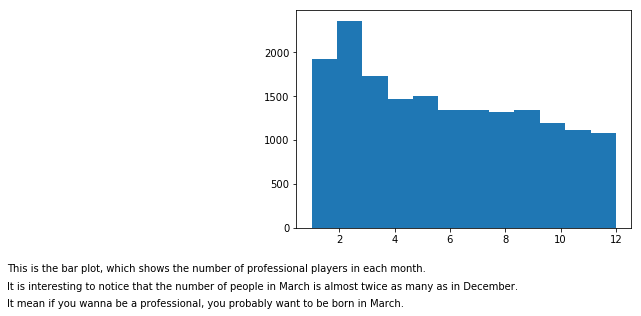

In [69]:

birth = [[],[]]
month = [1,2,3,4,5,6,7,8,9,10,11,12]
birthCount = [0,0,0,0,0,0,0,0,0,0,0,0]
for date in x[4]:
   birth[0].append(int((date[5]+date[6])))
for month in birth[0]:
    birthCount[month-1] = birthCount[month-1]+ 1
plt.text(-10,-500, 'This is the bar plot, which shows the number of professional players in each month.')
plt.text(-10,-700, 'It is interesting to notice that the number of people in March is almost twice as many as in December.')
plt.text(-10,-900, 'It mean if you wanna be a professional, you probably want to be born in March.')
plt.hist(birth[0],12)
plt.show()